In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

The education spending data from 2018 Annual Survey of School System Finances, U.S. Census Bureau

https://www.census.gov/data/tables/2018/econ/school-finances/secondary-education-finance.html

In [2]:
df = pd.read_csv('Data/state list all.csv')

In [3]:
df

,STATE,Median personal earning white,Median personal earning black,Difference_Income_Personal,White poverty rate,Black poverty rate,Difference_poverty,Unemployment white,Unemployment black,Difference_unemployment,...,White education index,White income index,Difference education index,Education spending,GDP per capita,Public assistance per capita,Minimum wage,Median peronal earning,Poverty rate,Remote rate
0,Alabama,31662,22433.0,9229.0,13.004768,30.266618,17.261849,5.554755,11.505229,5.950474,...,4.673199,4.894758,0.977380,9696,42688.71,6.585746,NaN,28864.51983,18.495659,57.637548
1,Alaska,41879,27003.0,14876.0,6.496343,16.451573,9.955230,6.167539,NaN,NaN,...,5.266660,7.049545,NaN,17725,69425.01,166.569163,9.80,36577.91741,10.340680,59.087398
2,Arizona,35370,26466.0,8904.0,11.036635,24.006826,12.970191,5.600465,10.497329,4.896864,...,5.363295,5.495628,0.947876,8238,44596.72,31.927054,10.00,30686.22761,17.372516,60.819197
3,Arkansas,29783,21467.0,8316.0,14.501356,33.857216,19.355861,4.940988,10.711158,5.770170,...,4.382345,4.008140,0.756640,10138,40641.87,184.675059,8.50,28117.17686,19.066288,55.827052
4,California,44344,31258.0,13086.0,10.036330,22.481444,12.445114,6.192211,11.923409,5.731198,...,6.223212,7.107686,1.558498,12497,67670.80,254.669724,10.50,32768.98594,15.343688,60.692573
5,Colorado,37842,30200.0,7642.0,8.247861,19.913807,11.665945,4.531674,9.714240,5.182566,...,6.373094,5.803388,2.153195,10201,59618.50,0.000000,9.30,35441.89990,11.490504,64.884788
6,Connecticut,45599,30269.0,15330.0,6.063988,20.470458,14.406471,5.244740,12.767315,7.522574,...,6.733497,7.197037,2.482233,20634,74542.31,108.051328,10.10,40436.49043,10.540539,65.991883
7,Delaware,38737,29400.0,9337.0,7.460182,20.152974,12.692792,5.496240,6.813388,1.317148,...,5.404632,6.134823,1.137370,15638,75382.46,29.600374,8.25,35913.56089,12.425640,63.298519
8,District of Columbia,68900,31571.0,37329.0,6.924996,26.574525,19.649529,3.072294,13.223717,10.151423,...,7.649900,9.511937,3.378408,22758,188788.41,NaN,11.50,50627.12788,17.319016,78.813552
9,Florida,32279,23321.0,8958.0,11.029751,25.153385,14.123635,5.949461,11.502387,5.552926,...,5.322829,5.092495,1.492107,9346,45943.47,10.211495,8.10,29524.20667,15.702154,61.416032


In [4]:
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [5]:
CI_mean(df['White education index'])

Average is: 5.385526905274511
95% CI of mean is: (5.193906240350772, 5.57714757019825)


In [6]:
CI_mean(df['Black education index'])

Average is: 4.043913202394736
95% CI of mean is: (3.9337849449777016, 4.154041459811771)


Compute CI mean and CI difference

Get states with and without disparity

In [7]:
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [8]:
CI_mean_diff(df['White education index'],df['Black education index'])

The average difference is: 1.3416137028797746
The 95% CI is: (1.1206007794849455, 1.5626266262746036)


In [9]:
df_new = df.dropna(subset=['White education index', 'Black education index'])
stats.ttest_ind(df_new['White education index'],df_new['Black education index'], equal_var = False)

Ttest_indResult(statistic=9.497311342976968, pvalue=3.2638074851892256e-13)

Paired t test

In [10]:
len(df_new)

38

In [11]:
stats.ttest_rel(df_new['White education index'],df_new['Black education index'])

Ttest_relResult(statistic=14.02099868757669, pvalue=2.216473236990239e-16)

In [12]:
data = df_new['White education index'] - df_new['Black education index']

In [13]:
se = np.std(data) / np.sqrt(len(data))

In [14]:
low = np.mean(data) - 1.96 * se
up = np.mean(data) + 1.96 * se
print("Mean:", np.mean(data))
print(low, up)

Mean: 1.3707326952105265
1.1816555840427305 1.5598098063783226


In [15]:
disparity = ['Alaska','Alabama','Colorado','District of Columbia','Georgia','Illinois','Kansas','Louisiana',
                                   'Maryland','Maine','Michigan','Mississippi','New York','North Carolina','Pennsylvania',
             'Oregon','South Carolina','Tennessee','Virginia','Wisconsin']

In [16]:
other = []
for state in df['STATE']:
    if state not in disparity:
        other.append(state)

In [17]:
df_disparity = df[df['STATE'].isin(disparity)]
df_other = df[df['STATE'].isin(other)]

Two-way ANOVA

In [18]:
len(df_disparity)

20

In [19]:
df_disparity = df_disparity.dropna(subset = ['White education index', 'Black education index'])
df_other = df_other.dropna(subset = ['White education index', 'Black education index'])
index = df_disparity['White education index'].tolist()
race = ['White'] * len(df_disparity)
disparity = ['Disparity'] * len(df_disparity)

index += df_disparity['Black education index'].tolist()
race += ['Black'] * len(df_disparity)
disparity += ['Disparity'] * len(df_disparity)

index += df_other['White education index'].tolist()
race += ['White'] * len(df_other)
disparity += ['Other'] * len(df_other)

index += df_other['Black education index'].tolist()
race += ['Black'] * len(df_other)
disparity += ['Other'] * len(df_other)

df_index = pd.DataFrame(list(zip(index, race, disparity)), 
               columns =['Index','Race','Disparity'])

In [20]:
df_index

,Index,Race,Disparity
0,4.673199,White,Disparity
1,6.373094,White,Disparity
2,7.649900,White,Disparity
3,5.340197,White,Disparity
4,6.027994,White,Disparity
...,...,...,...
71,3.777166,Black,Other
72,4.058904,Black,Other
73,4.372254,Black,Other
74,3.585137,Black,Other


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Index ~ C(Race) + C(Disparity) + C(Race):C(Disparity)', data=df_index).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Race),35.699254,1.0,88.910358,3.333457e-14
C(Disparity),0.131205,1.0,0.326770,5.693477e-01
C(Race):C(Disparity),0.247368,1.0,0.616080,4.350827e-01
Residual,28.909414,72.0,NaN,NaN


In [22]:
def average(i):
    df1 = df_disparity.dropna(subset=[i])
    df2 = df_other.dropna(subset=[i])
    test = stats.ttest_ind(df1[i],df2[i], equal_var = False)
    p = test[1]
    print("Disparity mean:", np.mean(df_disparity[i]))
    print("Other mean:", np.mean(df_other[i]))
    print("Disparity std:", np.std(df_disparity[i]))
    print("Other std:", np.std(df_other[i]))
    print("p-value:", p)
    print("Test result:", test)

In [23]:
average('Education spending')

Disparity mean: 13054.222222222223
Other mean: 12378.1
Disparity std: 4189.026465468446
Other std: 3429.7870764815707
p-value: 0.6023160020087053
Test result: Ttest_indResult(statistic=0.5261435957842535, pvalue=0.6023160020087053)


In [24]:
def confint(i):
    se = np.std(i)/np.sqrt(len(i))
    low = np.mean(i)-1.96*se
    up = np.mean(i)+1.96*se
    return low, up

In [25]:
def confint2(i):
    df1 = df_disparity.dropna(subset=[i])
    df2 = df_other.dropna(subset=[i])
    disparity = df1[i]
    other = df2[i]
    print('Disparity', confint(disparity))
    print('Other', confint(other))

In [26]:
confint2('Education spending')

Disparity (11118.990728957822, 14989.453715486623)
Other (10874.92953793284, 13881.270462067161)


Plot data

In [27]:
df = pd.read_csv('Data/state list all.csv')

In [28]:
df1 = df[['Education spending', 'White education index', 'Black education index']]

In [29]:
df1 = df1.dropna()

In [30]:
df1

,Education spending,White education index,Black education index
0,9696,4.673199,3.695819
2,8238,5.363295,4.415419
3,10138,4.382345,3.625705
4,12497,6.223212,4.664714
5,10201,6.373094,4.219898
6,20634,6.733497,4.251264
7,15638,5.404632,4.267263
8,22758,7.649900,4.271492
9,9346,5.322829,3.830722
10,10809,5.340197,4.241800


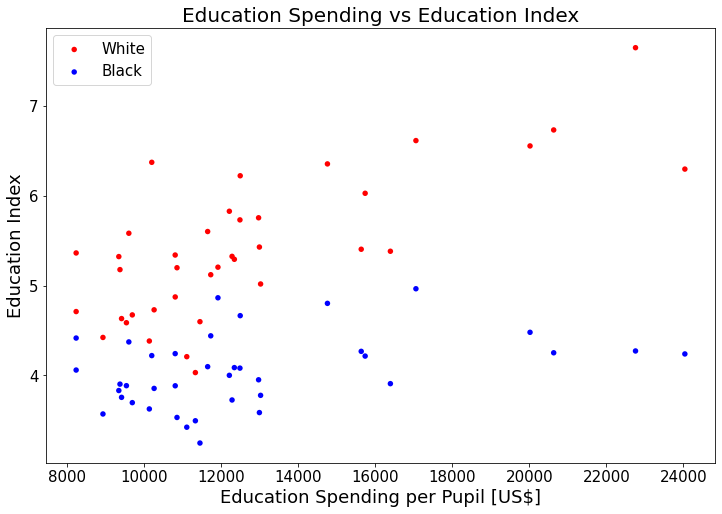

In [31]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df1['Education spending'], df1['White education index'], c='red', edgecolors='none', s=30, label='White')
axs.scatter(df1['Education spending'], df1['Black education index'], c='blue', edgecolors='none', s=30, label='Black')
plt.title("Education Spending vs Education Index", fontsize=20)
axs.set_xlabel("Education Spending per Pupil [US$]", fontsize=18)
axs.set_ylabel("Education Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

In [32]:
x_vals = df1['Education spending'].values
y_vals = df1['White education index']

reg_model_1 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     White education index   R-squared:                       0.541
Model:                               OLS   Adj. R-squared:                  0.529
Method:                    Least Squares   F-statistic:                     42.50
Date:                   Wed, 18 Nov 2020   Prob (F-statistic):           1.42e-07
Time:                           02:23:07   Log-Likelihood:                -29.708
No. Observations:                     38   AIC:                             63.42
Df Residuals:                         36   BIC:                             66.69
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5064      0.306     11.470      0.000       2.886       4.126
x1             0.0002   2.31e-05      6.519      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.092   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.056
Skew:                           0.061   Prob(JB):                        0.973
Kurtosis:                       2.858   Cond. No.                     4.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
x_vals = df1['Education spending'].values
y_vals = df1['Black education index']

reg_model_2 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Black education index   R-squared:                       0.138
Model:                               OLS   Adj. R-squared:                  0.114
Method:                    Least Squares   F-statistic:                     5.779
Date:                   Wed, 18 Nov 2020   Prob (F-statistic):             0.0215
Time:                           02:23:07   Log-Likelihood:                -16.391
No. Observations:                     38   AIC:                             36.78
Df Residuals:                         36   BIC:                             40.06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5482      0.215     16.478      0.000       3.112       3.985
x1          3.903e-05   1.62e-05      2.404      0.021     6.1e-06     7.2e-05
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.436
Skew:                           0.457   Prob(JB):                        0.488
Kurtosis:                       2.730   Cond. No.                     4.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
df['Black education index'].corr(df['Education spending'])

0.37192952946139046

In [35]:
stats.pearsonr(df1['Education spending'], df1['White education index'])

(0.7357874643975107, 1.4154737844374766e-07)

In [36]:
stats.pearsonr(df1['Education spending'], df1['Black education index'])

(0.37192952946139046, 0.021486988296252788)

In [37]:
x_plot = np.linspace(8000, 24000, 100) 

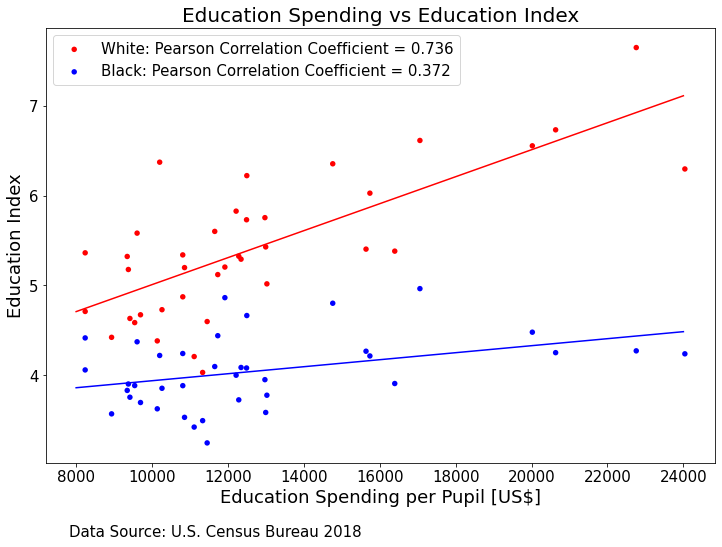

In [38]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df1['Education spending'], df1['White education index'], c='red', edgecolors='none', s=30,
            label='White: Pearson Correlation Coefficient = 0.736')
b0 = reg_model_1.params[0]
b1 = reg_model_1.params[1]
axs.plot(x_plot, x_plot*b1 + b0, color='red')

axs.scatter(df1['Education spending'], df1['Black education index'], c='blue', edgecolors='none', s=30,
            label='Black: Pearson Correlation Coefficient = 0.372')
b0 = reg_model_2.params[0]
b1 = reg_model_2.params[1]
axs.plot(x_plot, x_plot*b1 + b0, color='blue')

plt.title("Education Spending vs Education Index", fontsize=20)
axs.set_xlabel("Education Spending per Pupil [US$]", fontsize=18)
axs.set_ylabel("Education Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.text(7800, 2.2, "Data Source: U.S. Census Bureau 2018", fontsize=15)
plt.show()

In [2]:
df1 = pd.read_csv('Data/education.csv')

In [3]:
df = df1 * 100
df['Race'] = df1['Race']
df

,Race,0-8years,9-11years,12years,13-15years,16+years
0,Asian,7.122128,7.279898,13.882813,17.760815,53.954347
1,Black,3.246497,11.463015,28.458234,35.629776,21.202477
2,Hispanic,19.543624,14.451392,25.304658,26.284722,14.415605
3,Other,2.619809,8.447263,22.462868,40.144537,26.325523
4,White,1.592735,5.822667,23.813653,32.843989,35.926957


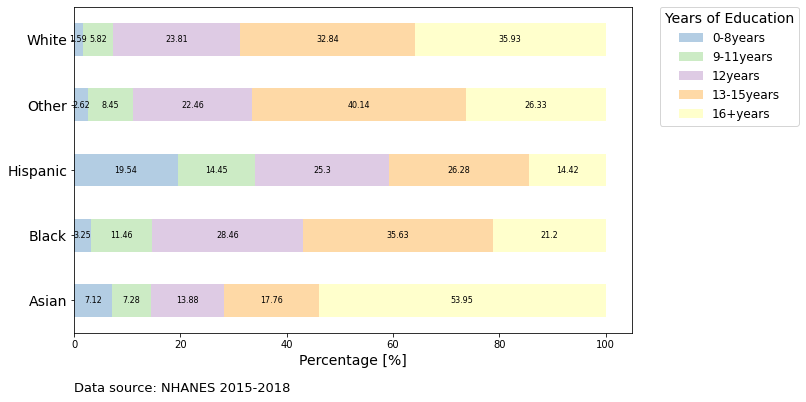

In [41]:
cmap = plt.get_cmap("Pastel1")
ax = df.plot.barh(stacked=True, figsize=(10,6), color=[cmap(1),cmap(2),cmap(3),cmap(4),cmap(5)])
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{round(width,2)}'
    
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Years of Education',
          title_fontsize=14,fontsize=12)    
ax.set_yticklabels(df['Race'], fontsize=14)
ax.set_ylabel("", fontsize=18)
ax.set_xlabel("Percentage [%]", fontsize=14)
plt.text(0, -1.4, "Data source: NHANES 2015-2018", fontsize=13)
plt.show()

In [8]:
df[['0-8years','9-11years','12years','13-15years','16+years']]*100

,0-8years,9-11years,12years,13-15years,16+years
0,712.21281,727.98976,1388.28130,1776.08146,5395.43467
1,324.64970,1146.30151,2845.82343,3562.97763,2120.24774
2,1954.36238,1445.13919,2530.46579,2628.47218,1441.56045
3,261.98094,844.72631,2246.28677,4014.45366,2632.55232
4,159.27349,582.26667,2381.36534,3284.39885,3592.69565


In [9]:
chi2, p, dof, expected = chi2_contingency(df[['0-8years','9-11years','12years','13-15years','16+years']]*100)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 8347.196403776605
p: 0.0
dof: 16
expected: [[ 682.495864    949.284688   2278.444526   3053.276756   3036.498166  ]
 [ 682.49586468  949.28468895 2278.44452828 3053.27675905 3036.49816904]
 [ 682.49586332  949.28468705 2278.44452372 3053.27675295 3036.49816296]
 [ 682.495864    949.284688   2278.444526   3053.276756   3036.498166  ]
 [ 682.495864    949.284688   2278.444526   3053.276756   3036.498166  ]]
